In [1]:
%matplotlib inline
import matplotlib.pyplot as plt
import os, lzma, csv, bz2
import tilemapbase
import numpy as np
import pyproj

#datadir = os.path.join("/media", "disk", "Data")
datadir = os.path.join("..", "..", "..", "..", "Data")

# The input data

A number of US data sources.

## Chicago

https://en.wikipedia.org/wiki/Chicago

City is about 200 square km, 2.7 million people.  Metro area is about 2.7 million people.

https://data.cityofchicago.org/Public-Safety/Crimes-2001-to-present/ijzp-q8t2

We are told that the coordinates:

> The longitude of the location where the incident occurred. This location is shifted from the actual location for partial redaction but falls on the same block.

And that the X/Y coords are projected as "State Plane Illinois East NAD 1983".

In [2]:
filename = os.path.join(datadir, "chicago_all.csv.xz")
with lzma.open(filename, "rt", encoding="UTF8") as f:
    reader = csv.reader(f)
    header = next(reader)
    print(header)
    for _, row in zip(range(5), reader):
        print(row)

['ID', 'Case Number', 'Date', 'Block', 'IUCR', 'Primary Type', 'Description', 'Location Description', 'Arrest', 'Domestic', 'Beat', 'District', 'Ward', 'Community Area', 'FBI Code', 'X Coordinate', 'Y Coordinate', 'Year', 'Updated On', 'Latitude', 'Longitude', 'Location']
['5189091', 'HM779248', '10/12/2006 10:58:00 AM', '108XX S AVENUE G', '1750', 'OFFENSE INVOLVING CHILDREN', 'CHILD ABUSE', 'RESIDENCE', 'false', 'false', '0432', '004', '10', '52', '20', '1203183', '1833703', '2006', '04/15/2016 08:55:02 AM', '41.698387427', '-87.531655723', '(41.698387427, -87.531655723)']
['5189094', 'HM778953', '12/16/2006 06:30:00 AM', '060XX S WOLCOTT AVE', '0890', 'THEFT', 'FROM BUILDING', 'RESIDENCE', 'false', 'false', '0714', '007', '15', '67', '06', '1164721', '1864687', '2006', '04/15/2016 08:55:02 AM', '41.784308275', '-87.671611538', '(41.784308275, -87.671611538)']
['5189096', 'HM779990', '12/17/2006 07:03:00 PM', '014XX E 74TH ST', '0460', 'BATTERY', 'SIMPLE', 'SIDEWALK', 'false', 'false

In [3]:
with lzma.open(filename, "rt", encoding="UTF8") as f:
    reader = csv.reader(f)
    header = next(reader)
    lo, la = header.index("Longitude"), header.index("Latitude")
    coords = []
    for row in reader:
        if row[lo] == "":
            continue
        coords.append((float(row[lo]), float(row[la])))
coords = np.asarray(coords)

In [4]:
coords_wm = np.asarray([tilemapbase.project(x, y) for x, y in coords])

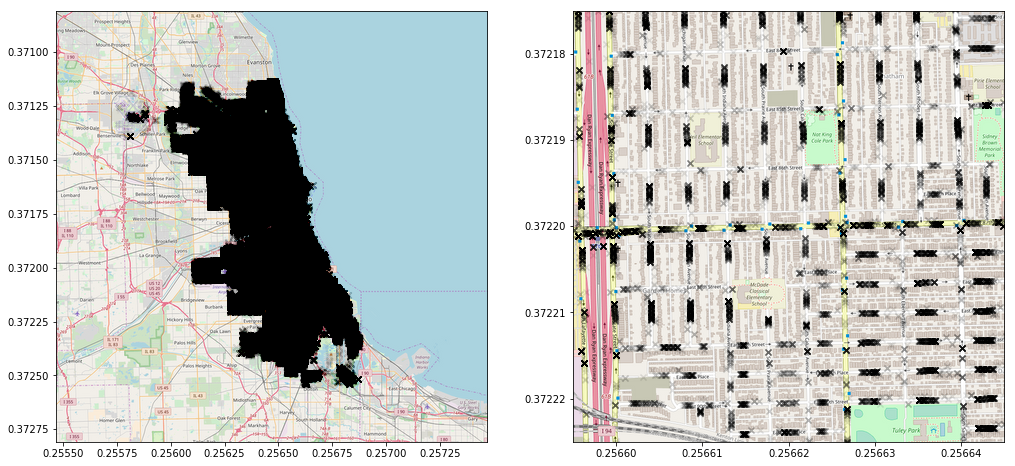

In [5]:
fig, ax = plt.subplots(ncols=2, figsize=(17,8))

ex = tilemapbase.Extent.from_centre_lonlat(*np.mean(coords, axis=0), xsize=0.002)
plotter = tilemapbase.Plotter(ex, tilemapbase.tiles.OSM, width=800)
plotter.plot(ax[0])
# Too dense
ax[0].scatter(*coords_wm.T, marker="x", color="black", alpha=0.005)
#pts = coords_wm[np.random.choice(coords_wm.shape[0], 50000, replace=False),:]
#ax[0].scatter(*pts.T, marker="x", color="black", alpha=0.5)

ex = tilemapbase.Extent.from_centre(0.25662, 0.3722, xsize=0.00005)
plotter = tilemapbase.Plotter(ex, tilemapbase.tiles.OSM, width=800)
plotter.plot(ax[1])
ax[1].scatter(*coords_wm.T, marker="x", color="black", alpha=0.1)
None

In [6]:
fig.savefig("Chicago_overview.png", dpi=150)

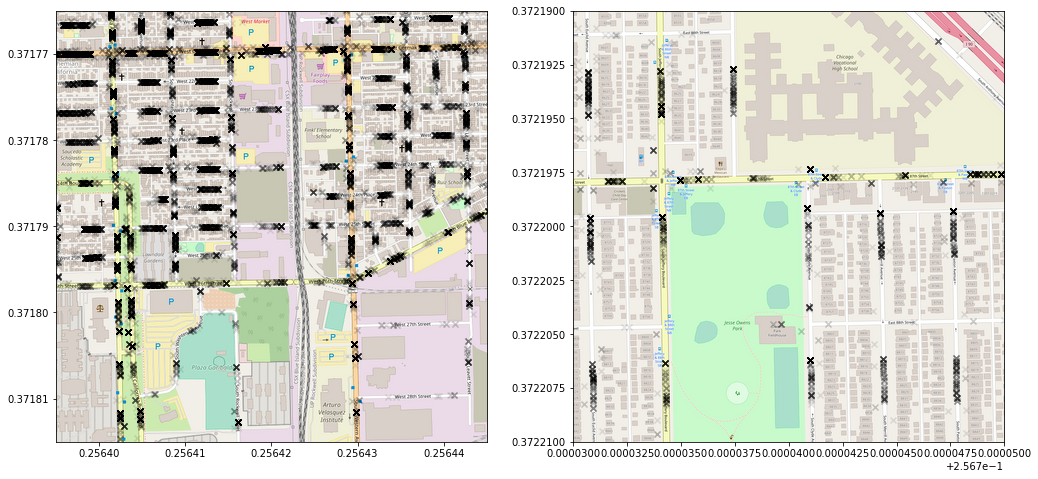

In [7]:
fig, ax = plt.subplots(ncols=2, figsize=(17,8))

ex = tilemapbase.Extent.from_centre(0.25642, 0.37179, xsize=0.00005)
plotter = tilemapbase.Plotter(ex, tilemapbase.tiles.OSM, width=800)
plotter.plot(ax[0])
ax[0].scatter(*coords_wm.T, marker="x", color="black", alpha=0.1)

ex = tilemapbase.Extent.from_centre(0.25674, 0.3722, xsize=0.00002)
plotter = tilemapbase.Plotter(ex, tilemapbase.tiles.OSM, width=800)
plotter.plot(ax[1])
ax[1].scatter(*coords_wm.T, marker="x", color="black", alpha=0.1)
None

In [8]:
import open_cp.sources.chicago as chicago
chicago.set_data_directory(datadir)

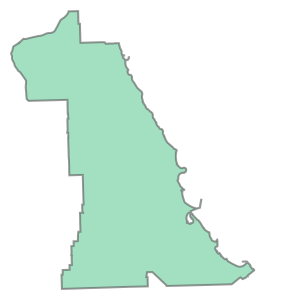

In [9]:
chicago.get_side("South")

## San Francisco

https://en.wikipedia.org/wiki/San_Francisco

City and county have a population of around 870 thousand.

https://data.sfgov.org/Public-Safety/Police-Department-Incidents/tmnf-yvry

Very little information about what the columns of the table are.  However, from some plots, it is clear that the "location" is very much block-level only.

TODO:

https://data.sfgov.org/Public-Safety/Police-Department-Calls-for-Service/hz9m-tj6z

In [4]:
filename = os.path.join(datadir, "SF_Police_Department_Incidents.csv.bz2")
with bz2.open(filename, "rt", encoding="UTF8") as f:
    reader = csv.reader(f)
    header = next(reader)
    print(header)
    for _, row in zip(range(5), reader):
        print(row)

['IncidntNum', 'Category', 'Descript', 'DayOfWeek', 'Date', 'Time', 'PdDistrict', 'Resolution', 'Address', 'X', 'Y', 'Location', 'PdId']
['150060275', 'NON-CRIMINAL', 'LOST PROPERTY', 'Monday', '01/19/2015', '14:00', 'MISSION', 'NONE', '18TH ST / VALENCIA ST', '-122.42158168137', '37.7617007179518', '(37.7617007179518, -122.42158168137)', '15006027571000']
['150098210', 'ROBBERY', 'ROBBERY, BODILY FORCE', 'Sunday', '02/01/2015', '15:45', 'TENDERLOIN', 'NONE', '300 Block of LEAVENWORTH ST', '-122.414406029855', '37.7841907151119', '(37.7841907151119, -122.414406029855)', '15009821003074']
['150098210', 'ASSAULT', 'AGGRAVATED ASSAULT WITH BODILY FORCE', 'Sunday', '02/01/2015', '15:45', 'TENDERLOIN', 'NONE', '300 Block of LEAVENWORTH ST', '-122.414406029855', '37.7841907151119', '(37.7841907151119, -122.414406029855)', '15009821004014']
['150098210', 'SECONDARY CODES', 'DOMESTIC VIOLENCE', 'Sunday', '02/01/2015', '15:45', 'TENDERLOIN', 'NONE', '300 Block of LEAVENWORTH ST', '-122.41440602

In [5]:
filename = os.path.join(datadir, "SF_Police_Department_Incidents.csv.bz2")
with bz2.open(filename, "rt", encoding="UTF8") as f:
    reader = csv.reader(f)
    header = next(reader)
    lo, la = header.index("X"), header.index("Y")
    coords = []
    for row in reader:
        if row[lo] == "":
            continue
        x, y = float(row[lo]), float(row[la])
        if np.abs(y-90) < 1e-5:
            continue
        coords.append((x, y))
coords = np.asarray(coords)

In [6]:
coords_wm = np.asarray([tilemapbase.project(x, y) for x, y in coords])

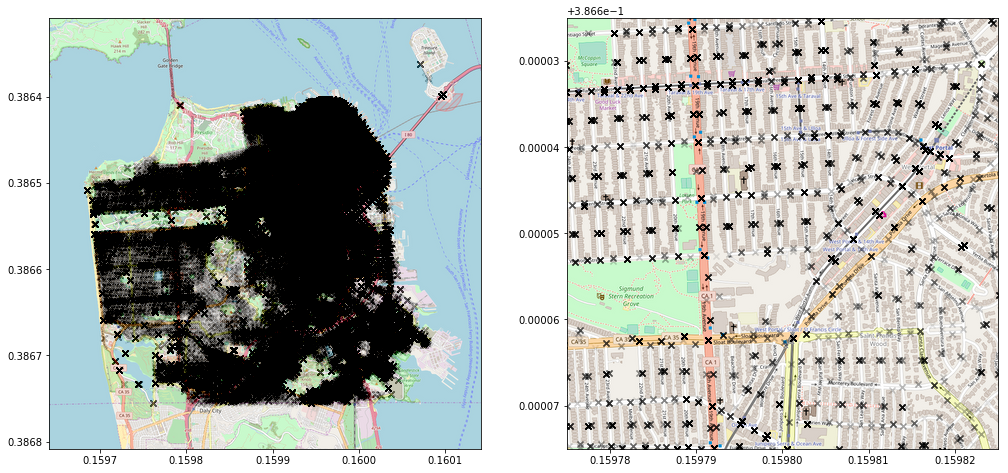

In [7]:
fig, ax = plt.subplots(ncols=2, figsize=(17,8))

xmin, ymin = np.min(coords, axis=0)
xmax, ymax = np.max(coords, axis=0)
x, y = (xmin + xmax) / 2, (ymin + ymax) / 2
ex = tilemapbase.Extent.from_centre_lonlat(x, y, xsize=0.0005)
plotter = tilemapbase.Plotter(ex, tilemapbase.tiles.OSM, width=800)
plotter.plot(ax[0])
ax[0].scatter(*coords_wm.T, marker="x", color="black", alpha=0.005)

ex = tilemapbase.Extent.from_centre(0.1598, 0.38665, xsize=0.00005)
plotter = tilemapbase.Plotter(ex, tilemapbase.tiles.OSM, width=800)
plotter.plot(ax[1])
ax[1].scatter(*coords_wm.T, marker="x", color="black", alpha=0.1)
None

In [8]:
fig.savefig("SF_overview.png", dpi=150)

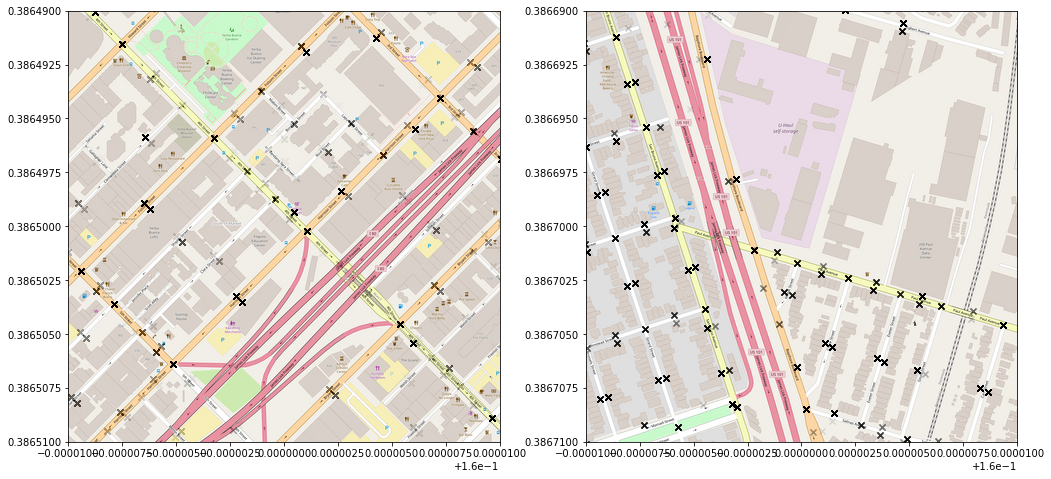

In [9]:
fig, ax = plt.subplots(ncols=2, figsize=(17,8))

xmin, ymin = np.min(coords, axis=0)
xmax, ymax = np.max(coords, axis=0)
x, y = (xmin + xmax) / 2, (ymin + ymax) / 2
ex = tilemapbase.Extent.from_centre(0.1600, 0.3865, xsize=0.00002)
plotter = tilemapbase.Plotter(ex, tilemapbase.tiles.OSM, width=800)
plotter.plot(ax[0])
ax[0].scatter(*coords_wm.T, marker="x", color="black", alpha=0.005)

ex = tilemapbase.Extent.from_centre(0.1600, 0.3867, xsize=0.00002)
plotter = tilemapbase.Plotter(ex, tilemapbase.tiles.OSM, width=800)
plotter.plot(ax[1])
ax[1].scatter(*coords_wm.T, marker="x", color="black", alpha=0.1)
None

# Dallas

https://en.wikipedia.org/wiki/Dallas  City area is around 1000 square kms, and population of 1.3 million.

Remarkably detailed crime data:

https://www.dallasopendata.com/Public-Safety/Police-Incidents/tbnj-w5hb

The "column descriptions" are not useful.

- Believe that the X/Y Coordinates are projected in EPSG:2845 [NAD83(HARN) / Texas North Central](http://spatialreference.org/ref/epsg/2845/)
- The final "location" field, for _older_ data, seems to carry longitude and latitude data
- As we shall see later, these do not fully agree.

In [2]:
filename = os.path.join(datadir, "Dallas_7_Dec_2017.csv.xz")
with lzma.open(filename, "rt", encoding="UTF8") as f:
    reader = csv.reader(f)
    header = next(reader)
    print(header)
    for _, row in zip(range(2), reader):
        print(row)

['Incident Number w/ Year', 'Year of Incident', 'Incident Number wo/ Year', 'Offense Service Number', 'Service Number ID', 'Watch', 'Call (911) Problem', 'Type of Incident', 'Penalty Class', 'Type of Location', 'Type of Property', 'Street Block', 'Street Direction', 'Street Name', 'Incident Address', 'Apartment Number', 'Zip Code', 'City', 'State', ' X Coordinate ', ' Y Coordinate', 'Reporting Area', 'Beat', 'Division', 'Sector', 'Council District', 'Target Area Action Grids', 'Community', 'Date1 of Occurrence', 'Year1 of Occurrence', 'Month1 of Occurence', 'Day1 of the Week', 'Time1 of Occurrence', 'Day1 of the Year', 'Date2 of Occurrence', 'Year2 of Occurrence', 'Month2 of Occurence', 'Day2 of the Week', 'Time2 of Occurrence', 'Day2 of the Year', 'Starting  Date/Time', 'Ending Date/Time', 'Map Date', 'Date of Report', 'Date incident created', 'Offense Entered Year', 'Offense Entered Month', 'Offense Entered Day of the Week', 'Offense Entered Time', 'Offense Entered  Date/Time', 'Call

In [3]:
with lzma.open(filename, "rt", encoding="UTF8") as f:
    reader = csv.reader(f)
    header = next(reader)
    lo, la = header.index(" X Coordinate "), header.index(" Y Coordinate")
    coords = []
    for row in reader:
        if row[lo] == "":
            continue
        x, y = float(row[lo]), float(row[la])
        coords.append((x, y))
coords = np.asarray(coords)

In [4]:
proj = pyproj.Proj({"init":"epsg:2845"})
coords_meters = coords * 1200/3937
xcs, ycs = proj(*coords_meters.T, inverse=True)
coords_wm = np.asarray([tilemapbase.project(x, y) for x, y in zip(xcs, ycs)])

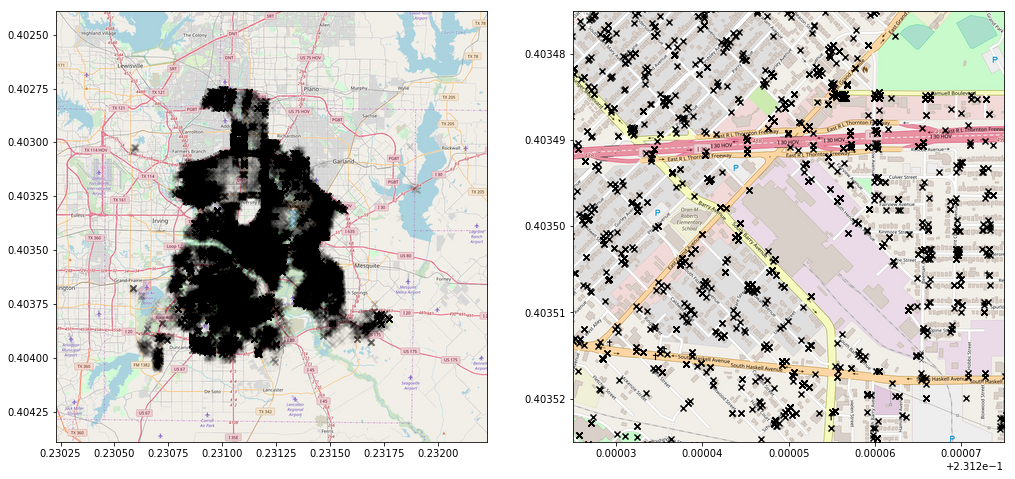

In [5]:
fig, ax = plt.subplots(ncols=2, figsize=(17,8))

x, y = (np.min(xcs) + np.max(xcs))/2, (np.min(ycs) + np.max(ycs))/2
ex = tilemapbase.Extent.from_centre_lonlat(x, y, xsize=0.002)
plotter = tilemapbase.Plotter(ex, tilemapbase.tiles.OSM, width=800)
plotter.plot(ax[0])
ax[0].scatter(*coords_wm.T, marker="x", color="black", alpha=0.01)

ex = tilemapbase.Extent.from_centre(0.23125, 0.4035, xsize=0.00005)
plotter = tilemapbase.Plotter(ex, tilemapbase.tiles.OSM, width=800)
plotter.plot(ax[1])
ax[1].scatter(*coords_wm.T, marker="x", color="black", alpha=1)
None

In [6]:
fig.savefig("Dallas_overview.png", dpi=100)

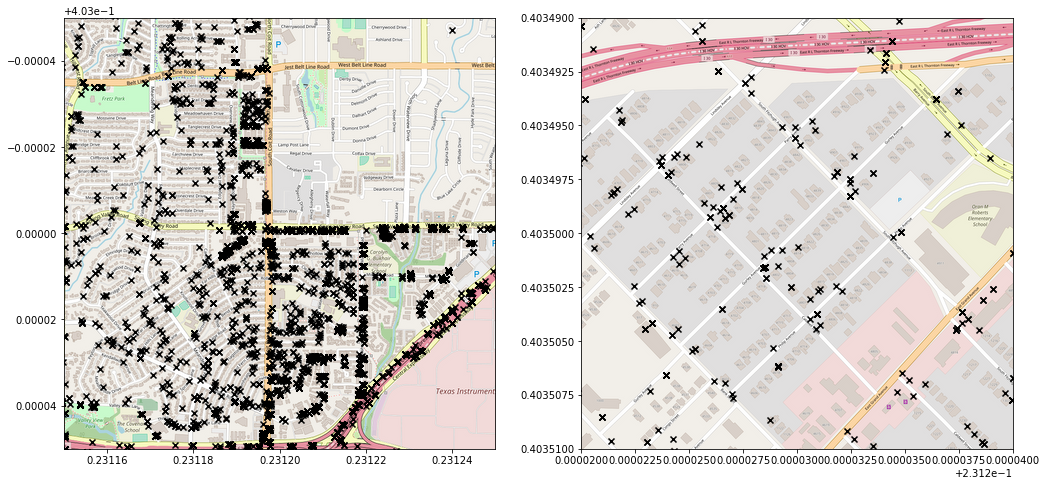

In [7]:
fig, ax = plt.subplots(ncols=2, figsize=(17,8))

ex = tilemapbase.Extent.from_centre(0.2312, 0.403, xsize=0.0001)
plotter = tilemapbase.Plotter(ex, tilemapbase.tiles.OSM, width=800)
plotter.plot(ax[0])
ax[0].scatter(*coords_wm.T, marker="x", color="black", alpha=1)

ex = tilemapbase.Extent.from_centre(0.23123, 0.4035, xsize=0.00002)
plotter = tilemapbase.Plotter(ex, tilemapbase.tiles.OSM, width=800)
plotter.plot(ax[1])
ax[1].scatter(*coords_wm.T, marker="x", color="black", alpha=1)
None

# Other sources we might consider in the future

### Austin

- https://data.austintexas.gov/Public-Safety/2016-Annual-Crime-Data/8iue-zpf6
- https://data.austintexas.gov/Public-Safety/Annual-Crime-Dataset-2015/spbg-9v94

Only gives the day of the event.

### Boston

- https://data.boston.gov/dataset/crime-incident-reports-august-2015-to-date-source-new-system/resource/12cb3883-56f5-47de-afa5-3b1cf61b257b

Crime incident report, rather than "crime", but could be filtered.  Don't know about geo-coding.

### Santa Monica

- https://data.smgov.net/Public-Safety/Police-Calls-for-Service/ia9m-wspt

Again, crime reports, not "crime".